In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_if_risk_occurs_triangular(attack_probability):
    probability = np.random.triangular(0, attack_probability, 1)
    return (np.random.rand()) < probability

In [9]:
def calculate_if_risk_occurs_normal(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29

    return (np.random.rand()) < np.random.lognormal(mean, std_dv)

In [14]:
def get_loss_amount(lower, upper):
    mean = (np.log(lower) + np.log(upper)) / 2.0
    std_dv = (np.log(upper) - np.log(lower)) / 3.29
    return np.random.lognormal(mean, std_dv)

In [15]:
def simulate_risk_portfolio(risk):
    total_loss_amount = 0
    if risk["distribution"] == "triangular":
        if calculate_if_risk_occurs_triangular(risk["probability"]):
            total_loss_amount += get_loss_amount(risk["lower"], risk["upper"])
    elif risk["distribution"] == "normal":
        if calculate_if_risk_occurs_normal(risk["lower_occ"], risk["upper_occ"]):
            total_loss_amount += get_loss_amount(risk["lower"], risk["upper"])
    return total_loss_amount

In [5]:
def monte_carlo_simulation(cyber_risks, iterations):
    yearly_losses = []
    for i in range(iterations):
        loss_amount = simulate_risk_portfolio(cyber_risks)
        yearly_losses.append(loss_amount)
    return yearly_losses

In [6]:
def calculate_loss_exceedance_prob(losses, risk):
    losses_np = np.array(losses)
    sorted_losses = np.sort(losses_np[losses_np != 0])
    num_losses = len(sorted_losses)
    exceedance_probs = [(num_losses - i) / (num_losses + 1) for i in range(num_losses)]

    # Plot the loss exceedance curve
    plt.plot(sorted_losses, exceedance_probs)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xlabel(f'Loss for {risk["name"]}')
    plt.ylabel('Exceedance Probability')
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.xlim(0, risk["xlim"])
    plt.xticks(np.arange(0, risk["upper"], risk["xticks"]))
    plt.title('Loss Exceedance Curve')
    plt.grid(True)
    plt.show()

In [7]:
def print_simulation_to_loss(losses, risk):
    no_of_simulations = np.arange(len(losses))
    plt.figure(figsize=(10, 10))

    plt.title('Monte-Carlo Distributions')
    plt.xlabel(f'Loss for {risk["name"]}')
    plt.ylabel(f'Simulation number')
    plt.plot(no_of_simulations, losses)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

31196.386713555337


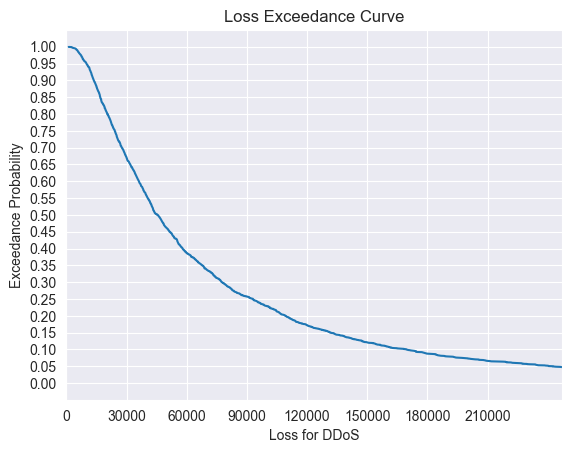

34966.53705688558


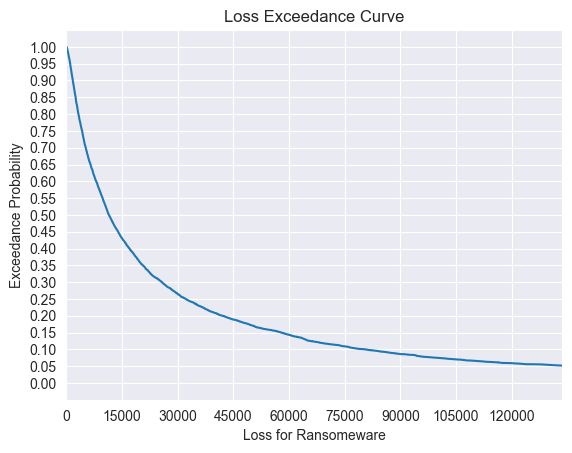

3687286.7871369375


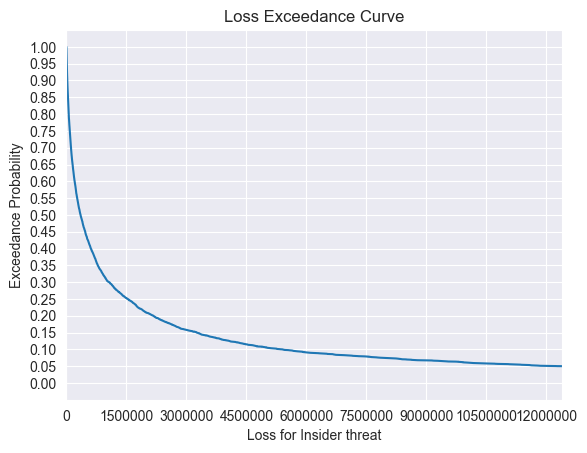

In [30]:
cs = [{
    "name": "DDoS",
    "probability": 0.2,
    "lower": 10000,
    "upper": 227308,
    "xlim": 247308,
    "xticks": 30000,
    "distribution": "triangular"
},
{
    "name": "Ransomeware",
    "upper_occ": 30,
    "lower_occ": 5,
    "lower": 1000,
    "upper": 133638,
    "xlim": 133638,
    "xticks": 15000,
    "distribution": "normal"
},
{
    "name": "Insider threat",
    "upper_occ": 40,
    "lower_occ": 21,
    "lower": 10000,
    "upper": 12400000,
    "xlim": 12400000,
    "xticks": 1500000,
    "distribution": "normal"
}
]

ITERATIONS = 5000
total_costs = []
for risk in cs:
    yearly_losses = monte_carlo_simulation(risk, iterations=ITERATIONS)
    print(sum(yearly_losses) / ITERATIONS)

    calculate_loss_exceedance_prob(yearly_losses, risk)
    total_costs.append(yearly_losses)
    #print_simulation_to_loss(yearly_losses, risk)